In [5]:
import logging
from pathlib import Path
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

USE_GPU = False

if USE_GPU:
    import manage_gpus as gpl

    gpl.get_gpu_lock()
import activation_learner
from pytorch_nmf import BetaDivergence
import param_estimator
import plot
from mixes.unmixdb import UnmixDB
import carve

In [6]:
# hyperparams
FS = 22050
HOP_SIZES = [4,2,1,0.5]
OVERLAP = 8
NMELS = 128
SPEC_POWER = 2
DIVERGENCE = BetaDivergence(0)
GAIN_ESTOR = param_estimator.GainEstimator.SUM
WARP_ESTOR = param_estimator.WarpEstimator.ARGMAX
LOW_POWER_THRESHOLD = 1e-3
CARVE_THRESHOLD = 1e-5
CARVE_BLUR_SIZE = 3
CARVE_MIN_DURATION = 5
CARVE_MAX_SLOPE = 1.5
# stop conditions
DLOSS_MIN = 1e-10
ITER_MAX = 5000
# paths
RESULTS_DIR = Path("/data5/anasynth_nonbp/andre/reverse-dj-mix/results")
UNMIXDB_PATH = Path("/data2/anasynth_nonbp/schwarz/abc-dj/data/unmixdb-zenodo")
#############################

In [7]:
dataset = UnmixDB(
    "/data2/anasynth_nonbp/schwarz/abc-dj/data/unmixdb-zenodo/"
)  # inverno
# dataset = UnmixDB("/data2/anasynth_nonbp/andre/unmixdb-zenodo") # guqin
# dataset = SyntheticDB()
mix = dataset.get_mix("set044mix3-none-none-15.mp3")
# mix = dataset.mixes[0]
logger = logging.getLogger()
logging.basicConfig()
logger.setLevel(logging.INFO)
logger.info(mix.name)

inputs = [track.audio for track in mix.tracks] + [mix.audio]

INFO:root:set044mix3-none-none-15.mp3
/data5/anasynth_nonbp/andre/reverse-dj-mix/nmf/mixes/classes.py:39: UserWarning: PySoundFile failed. Trying audioread instead.
  return librosa.load(self.audio_path, sr=FS)[0]
/data5/anasynth_nonbp/andre/venv/lib/python3.9/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/data5/anasynth_nonbp/andre/reverse-dj-mix/nmf/mixes/classes.py:39: UserWarning: PySoundFile failed. Trying audioread instead.
  return librosa.load(self.audio_path, sr=FS)[0]
/data5/anasynth_nonbp/andre/venv/lib/python3.9/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/data5/anasynth_nonbp/andre/re

INFO:activation_learner:Starting round with hop_size=4s, win_size=32s
INFO:activation_learner:win_len=705600
INFO:activation_learner:hop_len=88200
INFO:activation_learner:overlap=87.500000%
INFO:activation_learner:Transforming inputs
INFO:activation_learner:Running NMF on V:torch.Size([128, 27]), W:torch.Size([128, 36]), H:torch.Size([36, 27])
Loss=8.88e-03, dLoss = 6.89e-10: 100%|██████████| 5000/5000 [00:05<00:00, 955.68it/s] 
INFO:activation_learner:Stopped at NMF iteration=4999 loss=8.88e-03


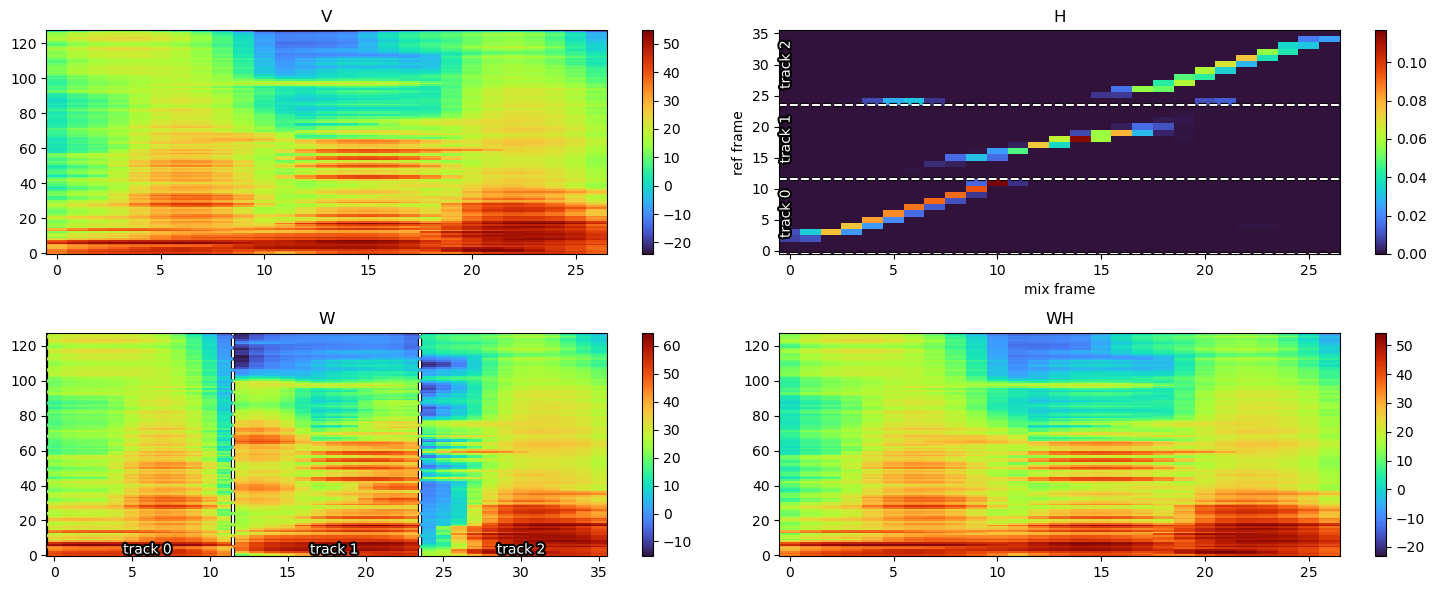

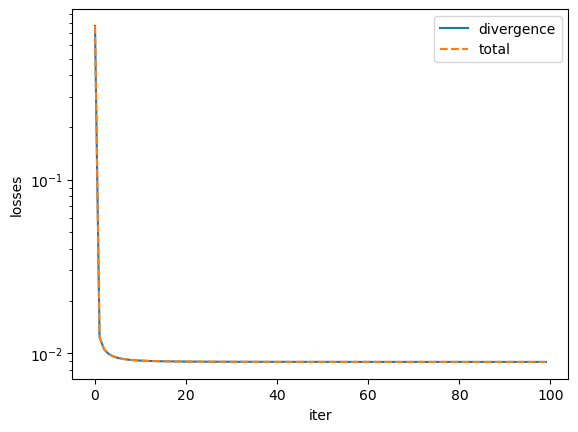

INFO:activation_learner:Starting round with hop_size=2s, win_size=16s
INFO:activation_learner:win_len=352800
INFO:activation_learner:hop_len=44100
INFO:activation_learner:overlap=87.500000%
INFO:activation_learner:Transforming inputs
INFO:carve:H_enhance: dest_shape=torch.Size([69, 53]), threshold=1e-05, blur_size=3, diag_size=2, max_slope=1.5, n_filters=15, diag_window='hann'


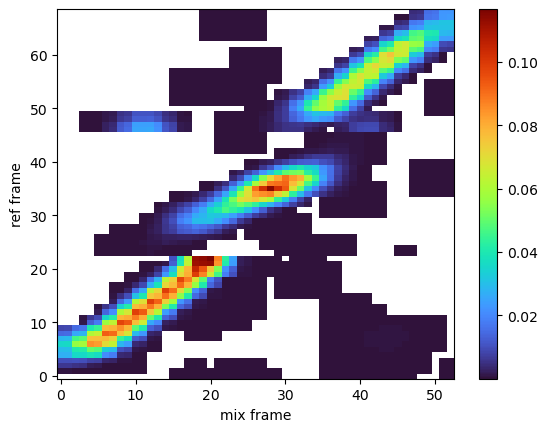

INFO:activation_learner:Running NMF on V:torch.Size([128, 53]), W:torch.Size([128, 69]), H:torch.Size([69, 53])
Loss=3.75e-03, dLoss = 3.19e-09: 100%|██████████| 5000/5000 [00:06<00:00, 798.97it/s] 
INFO:activation_learner:Stopped at NMF iteration=4999 loss=3.75e-03


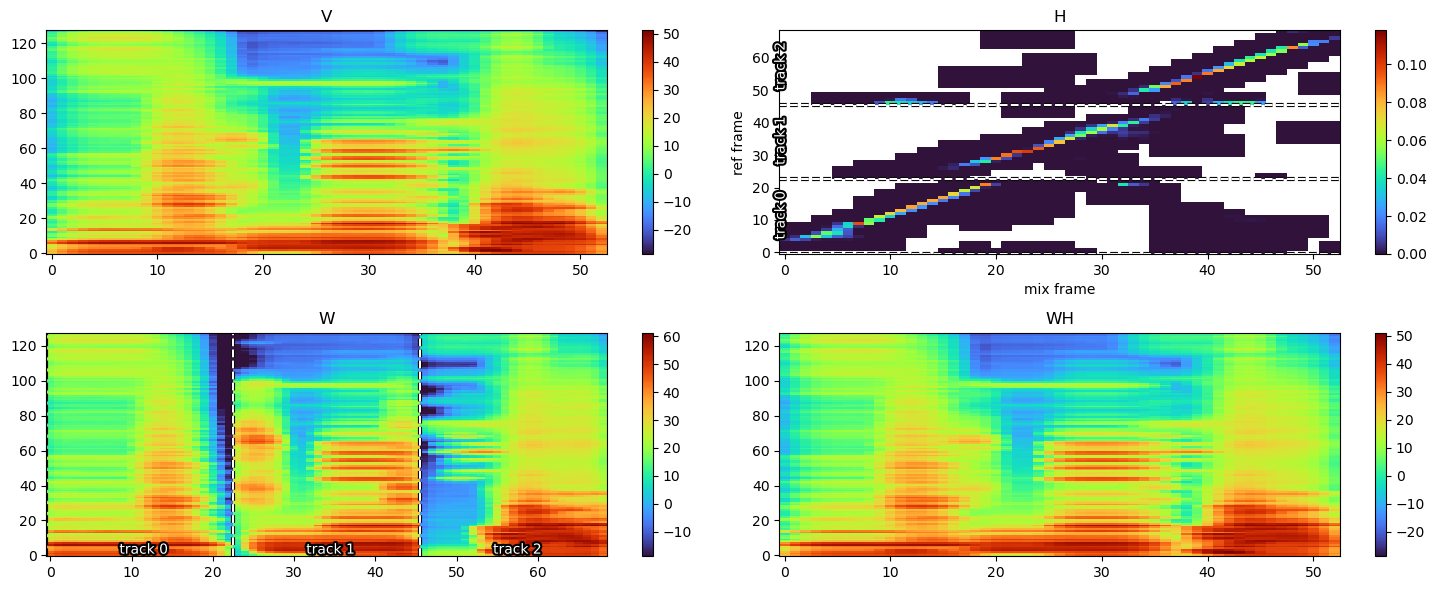

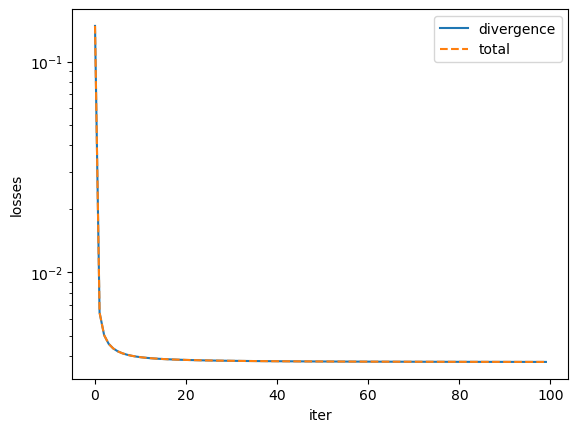

INFO:activation_learner:Starting round with hop_size=1s, win_size=8s
INFO:activation_learner:win_len=176400
INFO:activation_learner:hop_len=22050
INFO:activation_learner:overlap=87.500000%
INFO:activation_learner:Transforming inputs
INFO:carve:H_enhance: dest_shape=torch.Size([138, 105]), threshold=1e-05, blur_size=3, diag_size=2, max_slope=1.5, n_filters=15, diag_window='hann'


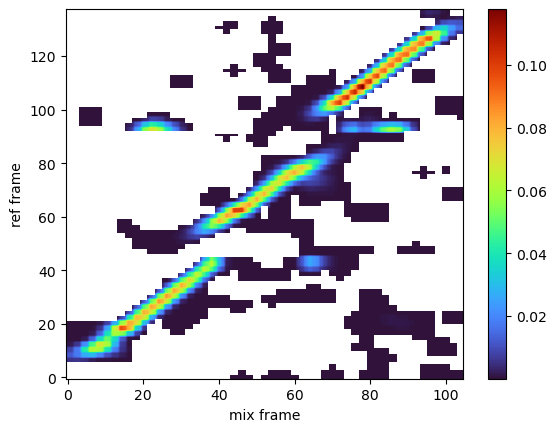

INFO:activation_learner:Running NMF on V:torch.Size([128, 105]), W:torch.Size([128, 138]), H:torch.Size([138, 105])
Loss=3.09e-03, dLoss = 2.64e-09: 100%|██████████| 5000/5000 [00:13<00:00, 361.24it/s]
INFO:activation_learner:Stopped at NMF iteration=4999 loss=3.09e-03


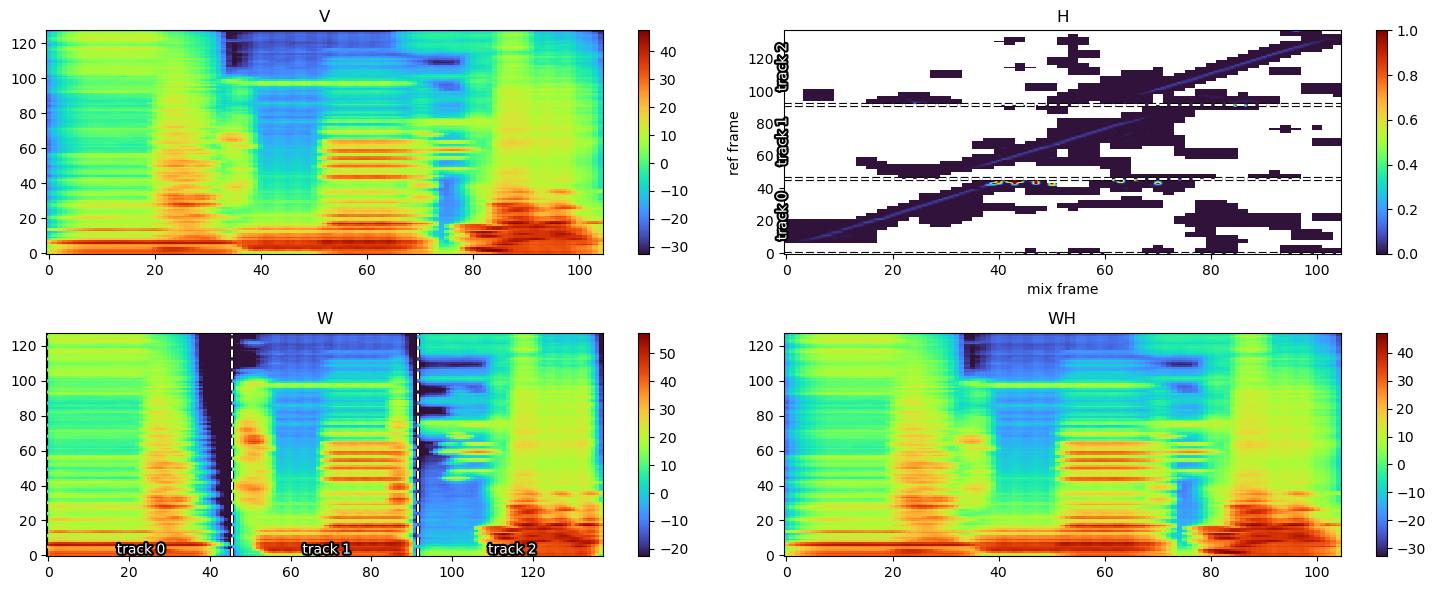

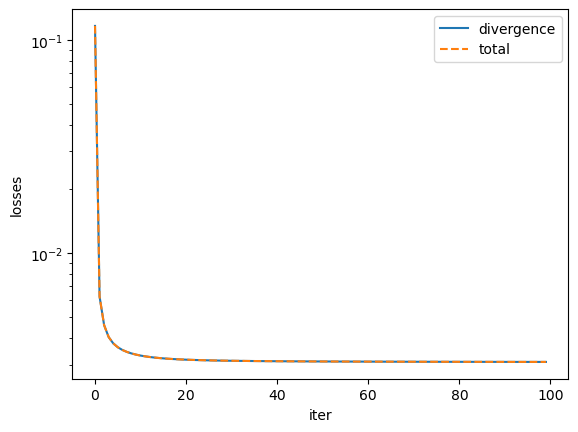

INFO:activation_learner:Starting round with hop_size=0.5s, win_size=4.0s
INFO:activation_learner:win_len=88200
INFO:activation_learner:hop_len=11025
INFO:activation_learner:overlap=87.500000%
INFO:activation_learner:Transforming inputs
INFO:carve:H_enhance: dest_shape=torch.Size([273, 209]), threshold=1e-05, blur_size=3, diag_size=2, max_slope=1.5, n_filters=15, diag_window='hann'


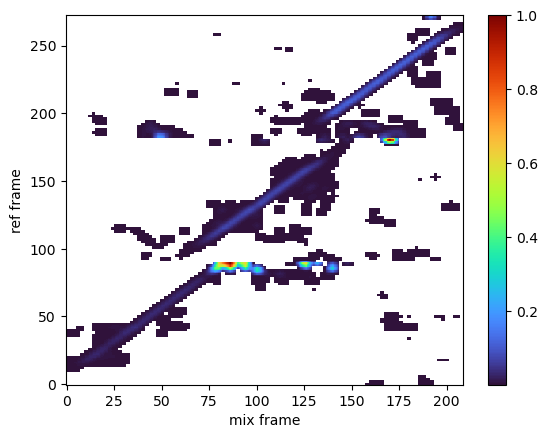

INFO:activation_learner:Running NMF on V:torch.Size([128, 209]), W:torch.Size([128, 273]), H:torch.Size([273, 209])
Loss=3.69e-03, dLoss = 1.76e-09: 100%|██████████| 5000/5000 [00:37<00:00, 133.67it/s]
INFO:activation_learner:Stopped at NMF iteration=4999 loss=3.69e-03


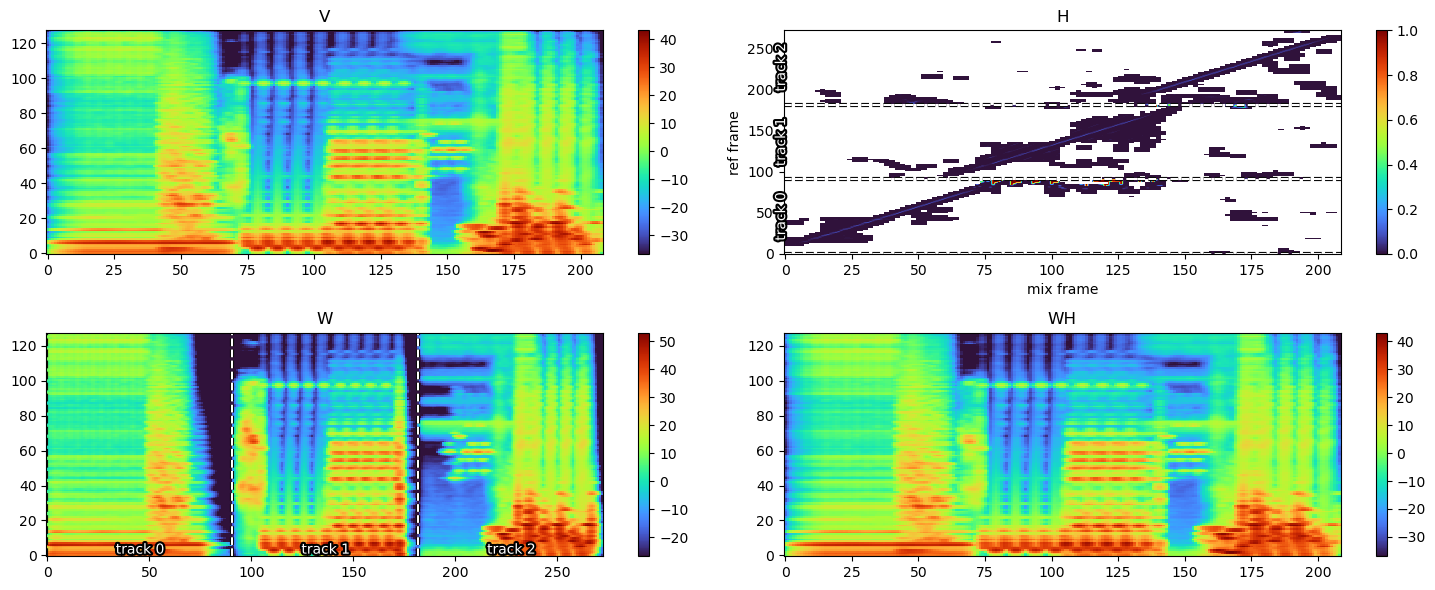

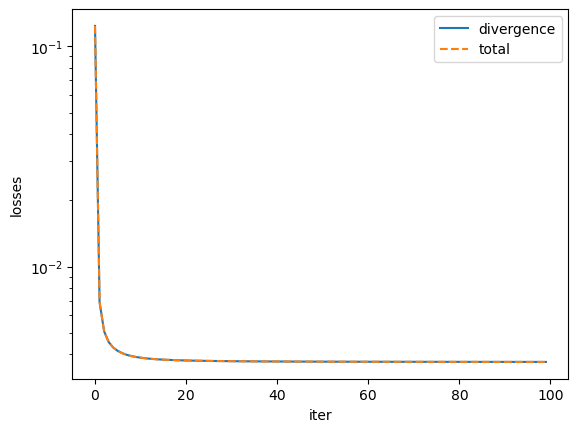

In [8]:
learner, loss_history = activation_learner.multistage(
    inputs,
    FS,
    hops=HOP_SIZES,
    overlap=OVERLAP,
    nmels=NMELS,
    low_power_threshold=LOW_POWER_THRESHOLD,
    spec_power=SPEC_POWER,
    divergence=DIVERGENCE,
    iter_max=ITER_MAX,
    dloss_min=DLOSS_MIN,
    carve_threshold=CARVE_THRESHOLD,
    carve_blur_size=CARVE_BLUR_SIZE,
    carve_min_duration=CARVE_MIN_DURATION,
    carve_max_slope=CARVE_MAX_SLOPE,
    doplot=True,
)

INFO:root:Estimating gain with method <function GainEstimator.SUM at 0x7f83e55e8c10>
INFO:root:Estimating warp with method <function WarpEstimator.ARGMAX at 0x7f83e55e8dc0>


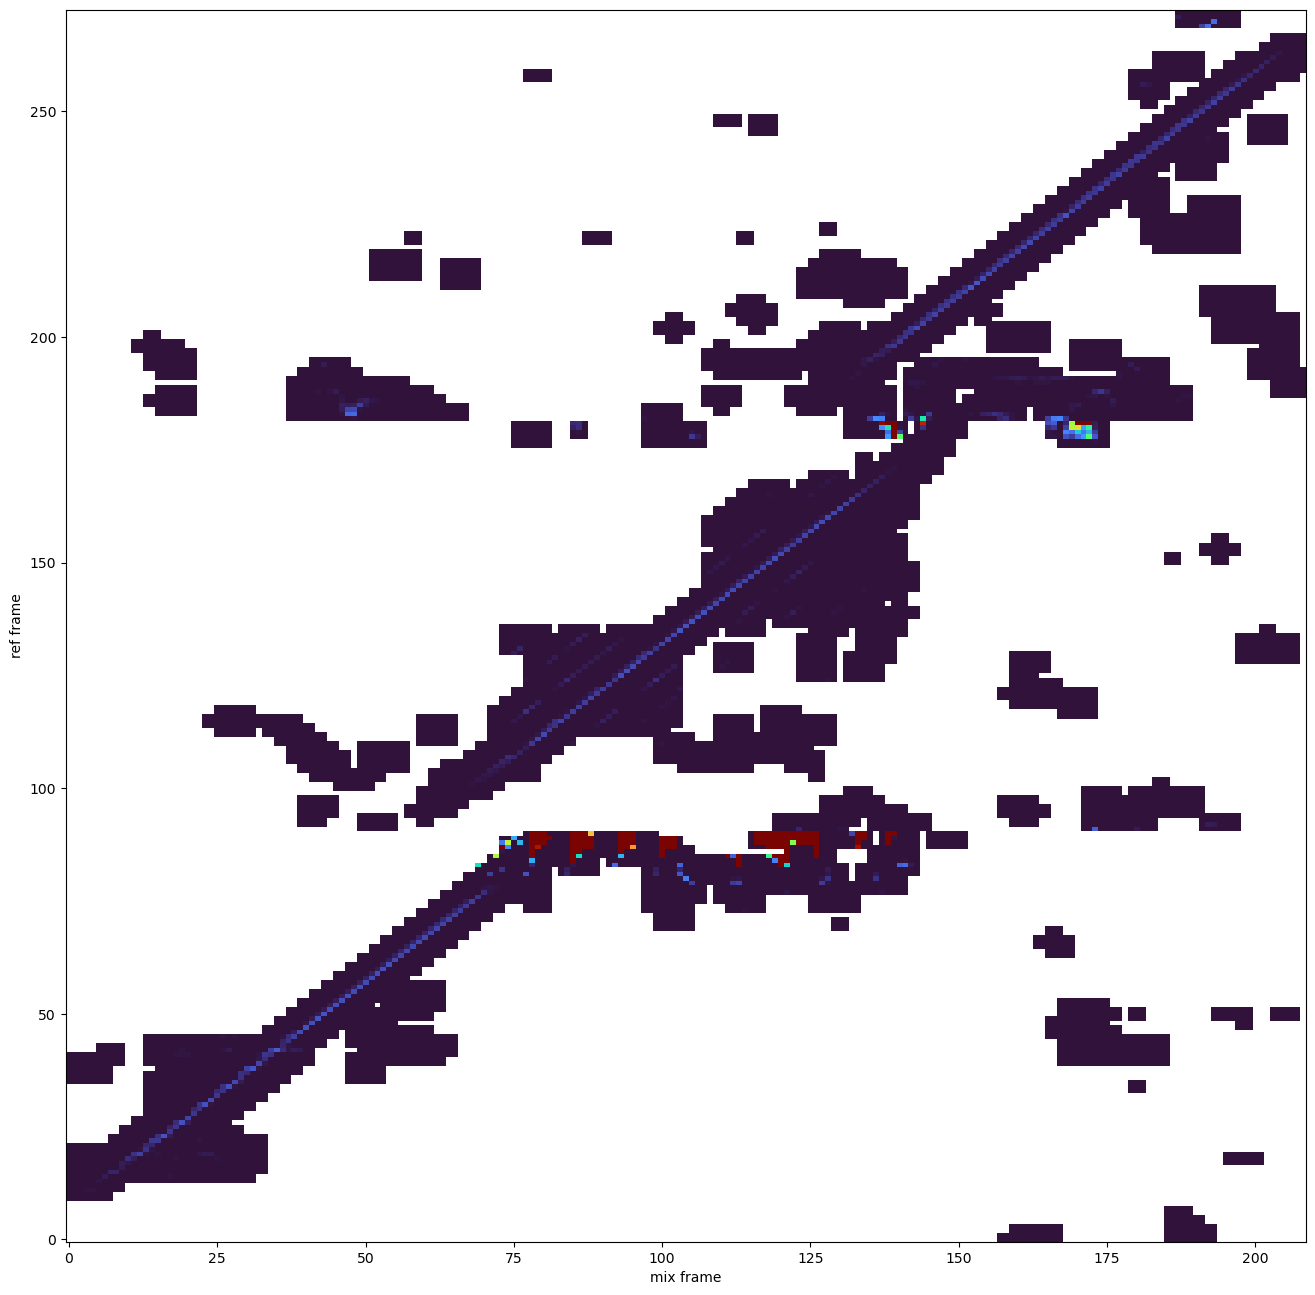

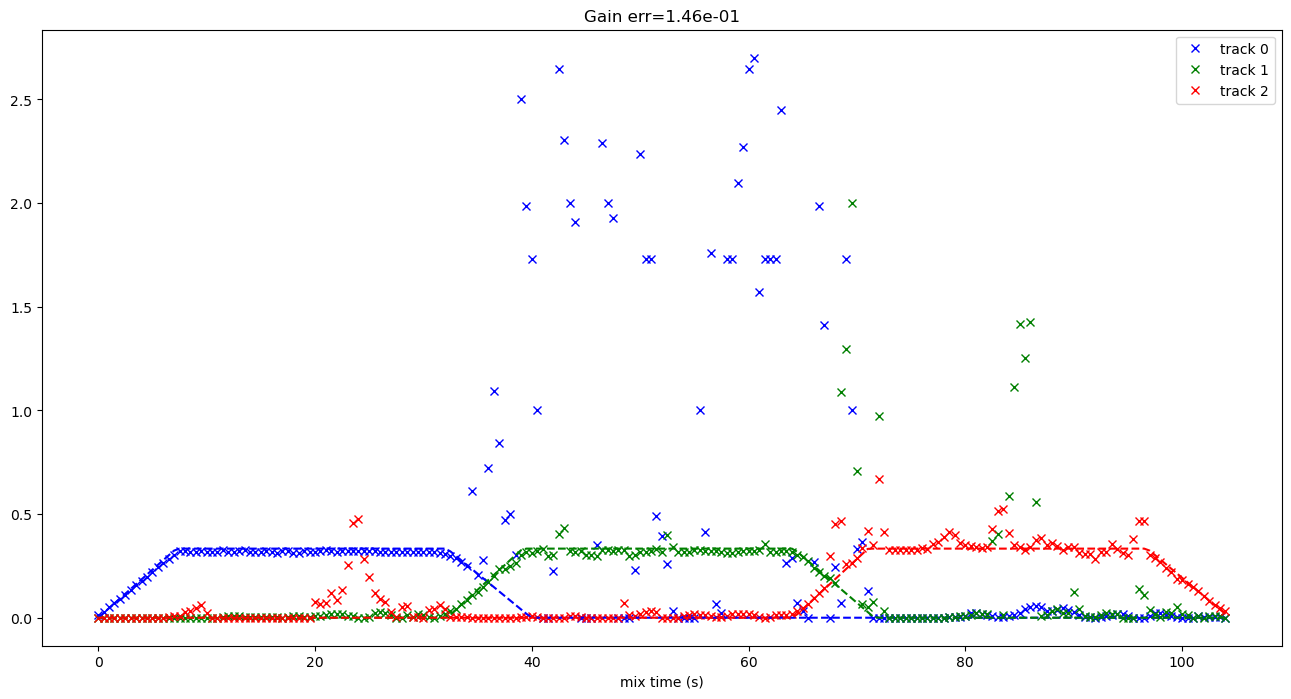

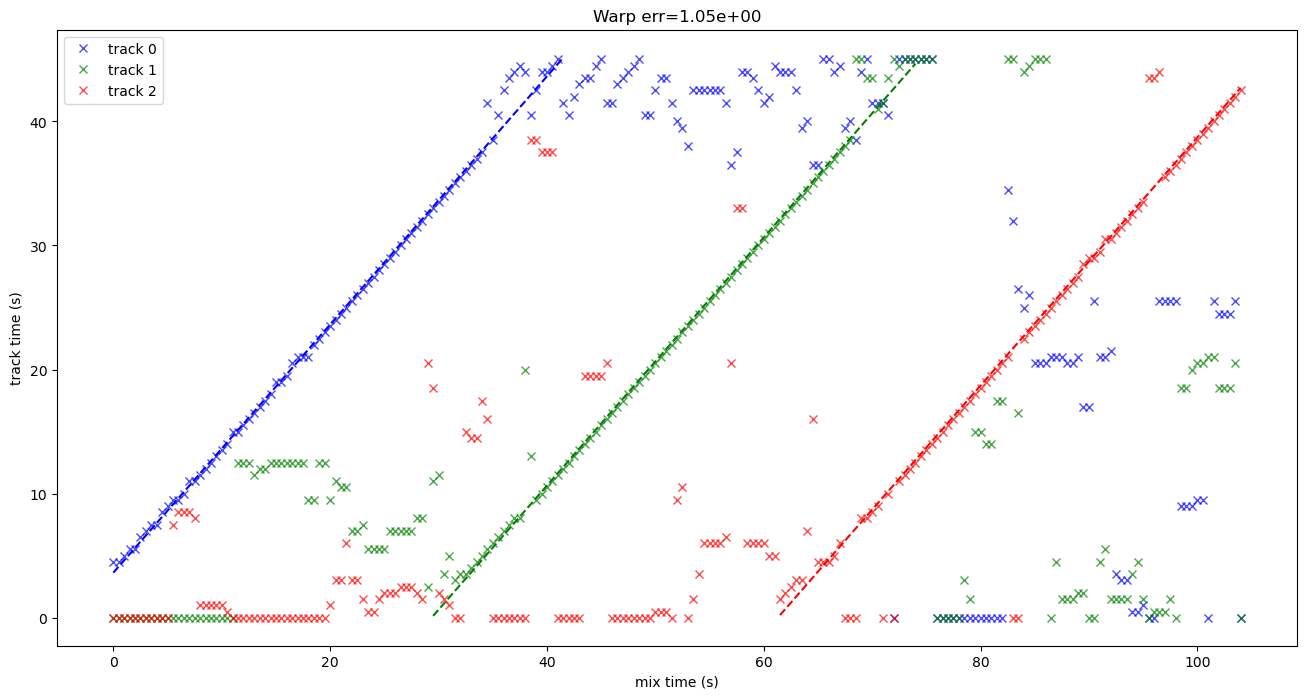

In [9]:
# get ground truth
tau = np.arange(0, learner.V.shape[1]) * HOP_SIZES[-1]
real_gain = mix.gain(tau)
real_warp = mix.warp(tau)

# estimate gain
logger.info(f"Estimating gain with method {GAIN_ESTOR}")
est_gain = GAIN_ESTOR(learner.H, learner.split_idx, SPEC_POWER)

# estimate warp
logger.info(f"Estimating warp with method {WARP_ESTOR}")
est_warp = WARP_ESTOR(learner.H, learner.split_idx, HOP_SIZES[-1])

gain_err = param_estimator.error(est_gain, real_gain)
warp_err = param_estimator.error(est_warp, real_warp)

plt.figure(figsize=(16,16))
plot.plot_H(learner.H.detach().numpy())

plt.figure(figsize=(16,8))
plot.plot_gain(tau, est_gain, real_gain)
plt.title(f"Gain err={gain_err:.2e}")
plt.show()

plt.figure(figsize=(16,8))
plot.plot_warp(tau, est_warp, real_warp)
plt.title(f"Warp err={warp_err:.2e}")
plt.show()


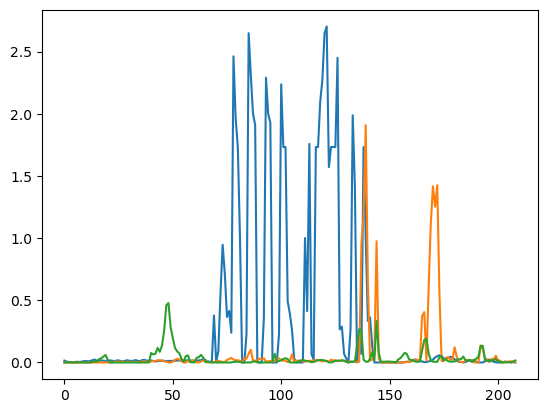

In [10]:
plt.plot(abs(est_gain - real_gain))

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 30.303030303030305 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y animation.mp4


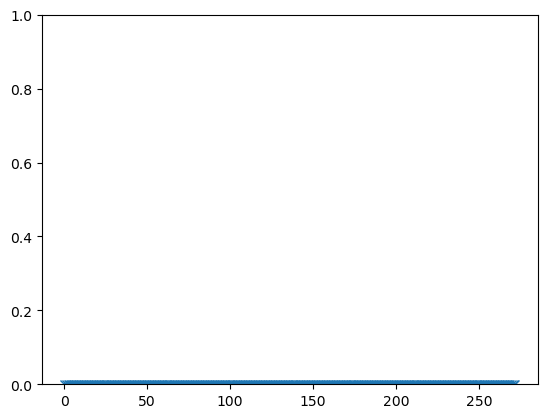

In [11]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import Video, display

fig, ax = plt.subplots()
ax.set_ylim(0, learner.H.detach().numpy().max())
(line,) = ax.plot(learner.H[:, 0].detach().numpy(), "x-")


def update(i):
    line.set_ydata(learner.H[:, i].detach().numpy())
    return (line,)


ani = animation.FuncAnimation(
    fig, update, frames=range(learner.H.shape[1]), blit=True, interval=int(1000 / 30)
)

ani.save("animation.mp4", writer="ffmpeg")
display(Video("animation.mp4"))

In [12]:
from IPython.display import Audio
display(Audio(inputs[-1], rate=FS))